In [1]:
from keras.datasets import fashion_mnist
import matplotlib.pyplot as plt
import keras
from keras.models import Model
from keras.preprocessing.image import array_to_img
import numpy as np
from keras.layers import Input, Conv2D, Dense, Flatten, Dropout



In [2]:

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
X_train, X_test = X_train/255, X_test/255

4422102/4422102 [==============================] - 0s 0us/step


In [3]:
X_train = np.expand_dims(X_train, -1)
X_test = np.expand_dims(X_test, -1)
print(X_train.shape)

len(set(y_train))

(60000, 28, 28, 1)


10

In [4]:
i = Input(shape=X_train[0].shape)
x=Conv2D(32, (3, 3), strides =2,activation='relu')(i)
x=Conv2D(64, (3, 3), strides =2,activation='relu')(x)
x=Conv2D(128, (3, 3), strides =2,activation='relu')(x)
x = Flatten()(x)
x = Dropout(0.2)(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(10, activation='softmax')(x)
model = Model(i, x)


In [5]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [6]:
r = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=5)

Epoch 1/5
1875/1875 [==============================] - 24s 7ms/step - loss: 0.5192 - accuracy: 0.8087 - val_loss: 0.4213 - val_accuracy: 0.8429
Epoch 2/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3592 - accuracy: 0.8655 - val_loss: 0.3570 - val_accuracy: 0.8646
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3097 - accuracy: 0.8828 - val_loss: 0.3142 - val_accuracy: 0.8811
Epoch 4/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2784 - accuracy: 0.8949 - val_loss: 0.3140 - val_accuracy: 0.8853
Epoch 5/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2537 - accuracy: 0.9055 - val_loss: 0.2946 - val_accuracy: 0.8926


In [ ]:
roupas = {
    0: "T-shirt/top",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle boot"
}
Superior=  ['Tshirt/top', 'Pullover', 'Dress', 'Coat', 'Shirt']
Inferior ='Trouser'
Calçado = {'Sneaker', 'Ankle boot'}
Acessorio = 'Bag'
'Coat' in Calçado

False

In [ ]:
img = X_test[0]
prev = model.predict(img.reshape(1,28,28,1))
prev_roupas = np.argmax(prev)
roupas[prev_roupas]

1/1 [==============================] - 0s 53ms/step


'Ankle boot'

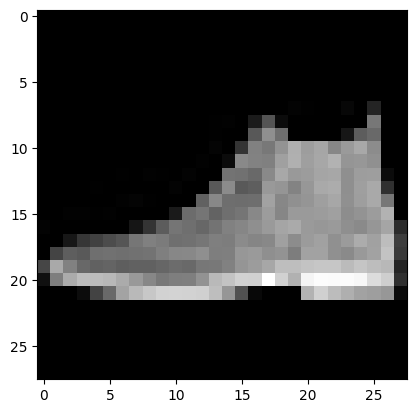

In [ ]:
prt = array_to_img(img)
plt.imshow(prt, cmap = 'gray')

579
1/1 [==============================] - 0s 23ms/step


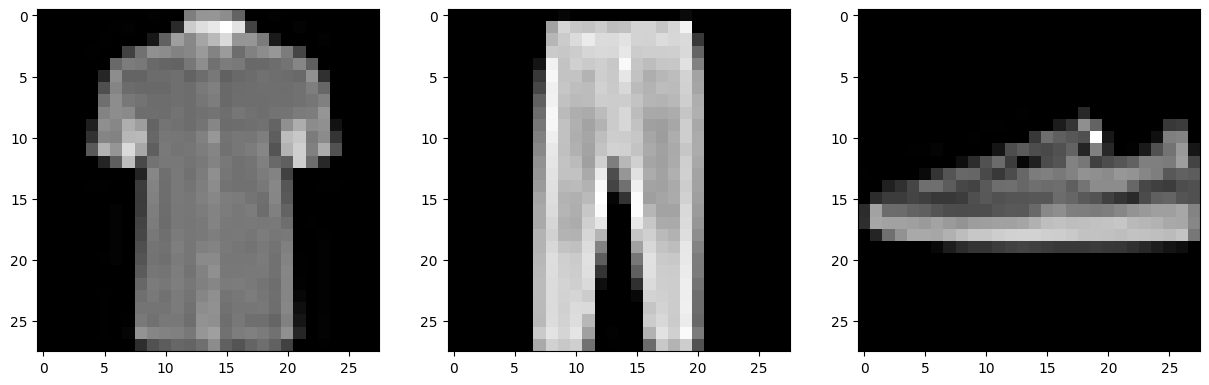

In [ ]:
entrada=int(input())
cima = False
baixo = False
pe = False
while cima == False or baixo == False or pe == False:
    img = X_test[entrada]
    prev = model.predict(img.reshape(1,28,28,1))
    prev_roupas = np.argmax(prev)
    if roupas[prev_roupas] in Superior and cima == False:
      cima = True


      img1 = (array_to_img(img))
    elif roupas[prev_roupas] in Inferior and baixo == False:
      baixo = True

      img2 =(array_to_img(img))
    elif roupas[prev_roupas] in Calçado and pe == False:
      pe = True

      img3= (array_to_img(img))
    entrada += 1
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
axs[0].imshow(img1, cmap='gray')
axs[1].imshow(img2, cmap='gray')
axs[2].imshow(img3, cmap='gray')


In [ ]:
print(array_to_img(img1))

<PIL.Image.Image image mode=L size=28x28 at 0x7B71067C0700>
